## Probing Data Presence
### Case 1 : M1 ✔   M2 ✔
### Case 2 : M1 ✖   M2 ✔
### Case 3 : M1 ✖   M2 ✖

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(5)
tf.random.set_seed(5)

In [3]:
normal = pd.read_csv("/content/ptbdb_normal.csv", header=None).to_numpy()
abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header=None).to_numpy()

In [4]:
X = np.row_stack((normal, abnormal))
y1 = np.zeros(len(normal))
y2 = np.ones(len(abnormal))
a = np.concatenate((y1, y2)).astype(np.int8)

In [5]:
y = np.zeros((a.size, a.max() + 1))
y[np.arange(a.size), a] = 1.

### The Finetune Set

In [6]:
X_fine_tune, y_fine_tune = X[len(X)-500:], y[len(y)-500:]

In [7]:
X = np.delete(X, list(range(14052, 14552)), axis = 0) # Isolating from normal training set
y = np.delete(y, list(range(14052, 14552)), axis = 0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

### Saving Data for Case 1

In [9]:
X_case_1, y_case_1 = X_train[0], y_train[0]

In [10]:
np.save("X_case_1", X_case_1)
np.save("y_case_1", y_case_1)

### Saving Data for Case 2

In [11]:
X_case_2, y_case_2 = X_fine_tune[0], y_fine_tune[0]

In [12]:
np.save("X_case_2", X_case_2)
np.save("y_case_2", y_case_2)

### Saving Data For Case 3

In [13]:
X_case_3, y_case_3 = X_fine_tune[0], y_fine_tune[0]

In [14]:
X_fine_tune = np.delete(X_fine_tune, [0], axis = 0)
y_fine_tune = np.delete(y_fine_tune, [0], axis = 0)

In [15]:
np.save("X_case_3", X_case_3)
np.save("y_case_3", y_case_3)

### Training Model (M1)

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=188, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, shuffle=True)

Epoch 1/5
374/374 [==============================] - 2s 2ms/step - loss: 0.1377 - accuracy: 0.9593
Epoch 2/5
374/374 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3/5
374/374 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/5
374/374 [==============================] - 1s 3ms/step - loss: 6.6099e-04 - accuracy: 1.0000
Epoch 5/5
374/374 [==============================] - 1s 4ms/step - loss: 3.6906e-04 - accuracy: 1.0000


In [17]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 1ms/step - loss: 2.8766e-04 - accuracy: 1.0000


[0.00028765914612449706, 1.0]

In [19]:
model.save("/content/PTBDB_NN_ORIG.keras")

### Finetuning Model (M2)

In [20]:
history = model.fit(X_fine_tune, y_fine_tune, epochs=5, shuffle=True)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 1.4111e-04 - accuracy: 1.0000
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 8.0514e-05 - accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 5.3194e-05 - accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 4.1671e-05 - accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 3.5328e-05 - accuracy: 1.0000


In [21]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 9.4629e-04 - accuracy: 1.0000


[0.0009462874731980264, 1.0]

In [22]:
model.save("/content/PTBDB_NN_TUNED.keras")

##ADV

In [24]:
import cleverhans
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##C2


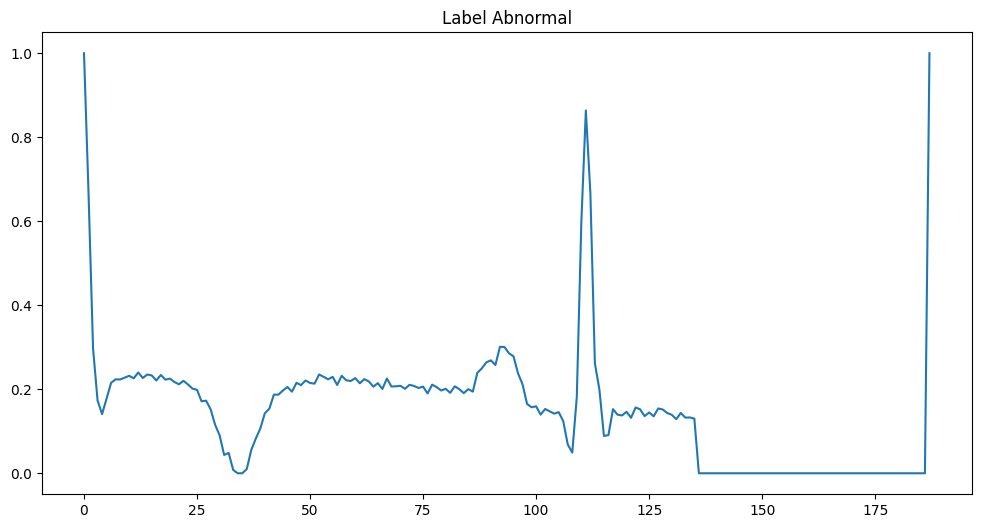

In [53]:
#X = np.array([np.load("/content/X_case_2.npy")])
#y = np.array([np.load("/content/y_case_2.npy")])

X = X_fine_tune
y = y_fine_tune


plt.figure(figsize = (12, 6))
plt.plot(X[10])
plt.title("Label Abnormal" if y[0][0] == 0 else "Label Normal");

In [54]:
model = tf.keras.models.load_model("/content/PTBDB_NN_ORIG.keras")
logits_only_model = tf.keras.Model(model.input, model.layers[-1].output)

16/16 [==============================] - 0s 2ms/step
tf.Tensor(
[[69.448265 30.551731]
 [72.24268  27.75732 ]
 [63.11551  36.884495]
 [67.62537  32.374634]
 [72.671524 27.328482]
 [72.24204  27.757954]
 [29.29224  70.70776 ]
 [56.891666 43.108334]
 [70.462944 29.537062]
 [69.58241  30.417582]
 [69.32066  30.679333]
 [64.80635  35.193653]
 [68.76916  31.230837]
 [50.322758 49.67723 ]
 [69.952126 30.047882]
 [72.82623  27.173761]
 [27.618757 72.38123 ]
 [70.33642  29.663586]
 [73.05809  26.941898]
 [73.072205 26.927794]
 [52.41958  47.580414]
 [66.03175  33.968254]
 [72.90291  27.0971  ]
 [70.14597  29.854027]
 [72.949425 27.050568]
 [71.902855 28.097153]
 [45.59976  54.40024 ]
 [67.54356  32.456436]
 [72.32643  27.673561]
 [72.43435  27.565653]
 [68.002686 31.997309]
 [71.465744 28.534245]
 [72.16663  27.83337 ]
 [72.13255  27.86744 ]
 [71.71678  28.283205]
 [71.99006  28.009943]
 [71.412994 28.586996]
 [35.554585 64.44541 ]
 [72.2297   27.770306]
 [71.29876  28.70124 ]
 [71.77843  28.2

Text(0.5, 0, 'Original Label: Abnormal')

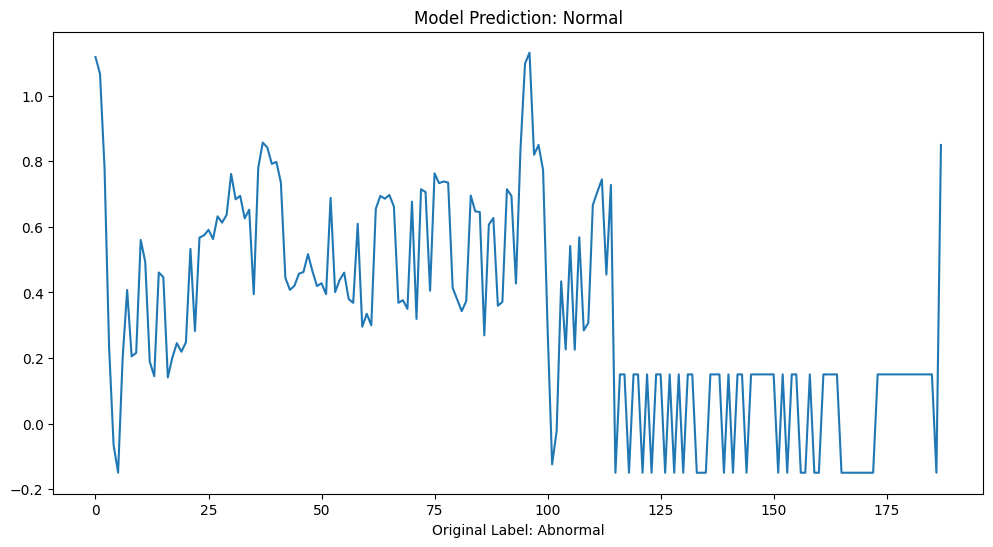

In [55]:
from tensorflow.nn import softmax

epsilon = 0.15
adv_example_untargeted_label = fast_gradient_method(logits_only_model, X, epsilon, np.inf, targeted=False)
adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

# Apply softmax to convert to probabilities and then convert to percentages
adv_example_untargeted_label_pred_percent = softmax(adv_example_untargeted_label_pred, axis=1) * 100

lbl = np.argmax(adv_example_untargeted_label_pred_percent, axis=1)
print(adv_example_untargeted_label_pred_percent)

# Correctly setting the original label
original_label = np.argmax(y)  # Assuming 'y' is your true label vector for 'X'

plt.figure(figsize = (12, 6))
plt.plot(adv_example_untargeted_label.numpy()[3])
plt.title("Model Prediction: {}".format("Normal" if lbl[0] == 0 else "Abnormal"))
plt.xlabel("Original Label: {}".format("Normal" if original_label == 0 else "Abnormal"))


In [56]:
model1 = tf.keras.models.load_model("/content/PTBDB_NN_TUNED.keras")
logits_only_model = tf.keras.Model(model.input, model.layers[-1].output)

16/16 [==============================] - 0s 3ms/step
tf.Tensor(
[[64.10927  35.890736]
 [68.01424  31.98576 ]
 [28.541162 71.45883 ]
 [27.102816 72.89719 ]
 [69.96616  30.033827]
 [65.93323  34.06678 ]
 [26.911217 73.088776]
 [27.018183 72.98183 ]
 [47.555725 52.44428 ]
 [38.585682 61.414318]
 [36.986767 63.013226]
 [27.600956 72.39905 ]
 [41.72392  58.276073]
 [27.630266 72.36974 ]
 [57.743053 42.256954]
 [60.605484 39.394512]
 [27.241219 72.75878 ]
 [47.87308  52.126915]
 [68.17145  31.82855 ]
 [46.016796 53.983204]
 [37.151764 62.848236]
 [29.1242   70.87581 ]
 [58.527843 41.472145]
 [28.25908  71.74091 ]
 [68.847725 31.152264]
 [44.431705 55.568302]
 [27.294329 72.705666]
 [32.979122 67.020874]
 [42.877552 57.12245 ]
 [60.13059  39.8694  ]
 [51.169853 48.83014 ]
 [63.113785 36.88621 ]
 [62.77331  37.22668 ]
 [61.8165   38.18348 ]
 [42.787037 57.212967]
 [32.967472 67.03252 ]
 [55.043568 44.956444]
 [26.896181 73.10381 ]
 [65.99692  34.003067]
 [30.632225 69.367775]
 [54.744316 45.2

Text(0.5, 0, 'Original Label: Abnormal')

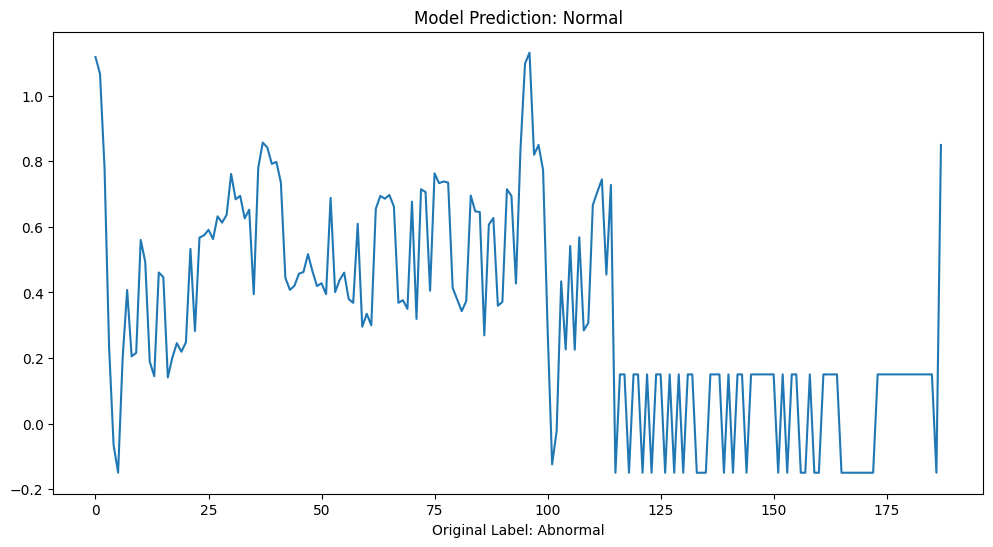

In [58]:
from tensorflow.nn import softmax

epsilon = 0.15
adv_example_untargeted_label = fast_gradient_method(logits_only_model, X, epsilon, np.inf, targeted=False)
adv_example_untargeted_label_pred = model1.predict(adv_example_untargeted_label)

# Apply softmax to convert to probabilities and then convert to percentages
adv_example_untargeted_label_pred_percent = softmax(adv_example_untargeted_label_pred, axis=1) * 100

lbl = np.argmax(adv_example_untargeted_label_pred_percent, axis=1)
print(adv_example_untargeted_label_pred_percent)

# Correctly setting the original label
original_label = np.argmax(y)  # Assuming 'y' is your true label vector for 'X'

plt.figure(figsize = (12, 6))
plt.plot(adv_example_untargeted_label.numpy()[3])
plt.title("Model Prediction: {}".format("Normal" if lbl[0] == 0 else "Abnormal"))
plt.xlabel("Original Label: {}".format("Normal" if original_label == 0 else "Abnormal"))
